In [3]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level

# 导入依赖
import warnings

warnings.filterwarnings("ignore")

# Disable logging messages unless there is an error
set_log_level("ERROR")

Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


In [4]:
df = pd.read_csv("/home/ann/opt/iNeuralProphet/data/tutorial01.csv")
df.head()

,ds,y
0,2014-12-31,65.41
1,2015-01-01,62.09
2,2015-01-02,69.44
3,2015-01-03,65.22
4,2015-01-04,58.91


In [5]:
# Model and prediction
m = NeuralProphet()
m.set_plotting_backend("plotly-static")

将我们的数据集拆分为训练集和验证集。我们将使用验证集来检查模型的性能。验证集的大小占我们总数据集的 20%。使用 split_df 中的参数 valid_p 调整大小。

In [6]:
df_train, df_val = m.split_df(df, valid_p=0.2)

print("Dataset size:", len(df))
print("Train dataset size:", len(df_train))
print("Validation dataset size:", len(df_val))

Dataset size: 1462
Train dataset size: 1170
Validation dataset size: 292


过在训练期间将验证集传递给拟合方法来执行验证。生成的指标显示模型与验证集相比的性能。

In [7]:
metrics = m.fit(df_train, validation_df=df_val, progress=None)
metrics

Finding best initial lr:   0%|          | 0/227 [00:00<?, ?it/s]

,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,train_loss,reg_loss,MAE,RMSE,Loss,RegLoss
0,75.804497,90.902992,1.142234,0.0,0,0.768005,0.0,64.945290,79.740173,0.767136,0.0
1,53.793682,67.163940,0.770981,0.0,1,0.554559,0.0,48.896008,60.765572,0.553142,0.0
2,35.728359,46.969921,0.472420,0.0,2,0.374993,0.0,35.531738,44.616173,0.372972,0.0
3,22.652887,30.233204,0.263899,0.0,3,0.247135,0.0,26.337444,32.476051,0.246621,0.0
4,14.199703,16.959885,0.124573,0.0,4,0.147360,0.0,18.653269,22.518770,0.146986,0.0
...,...,...,...,...,...,...,...,...,...,...,...
105,6.983158,8.900048,0.037032,0.0,105,0.013802,0.0,4.582947,6.236171,0.013786,0.0
106,6.950824,8.877695,0.036845,0.0,106,0.013797,0.0,4.557087,6.187435,0.013689,0.0
107,6.971427,8.902915,0.037064,0.0,107,0.013795,0.0,4.573657,6.217818,0.013755,0.0
108,6.995457,8.922684,0.037236,0.0,108,0.013795,0.0,4.584596,6.257534,0.013908,0.0


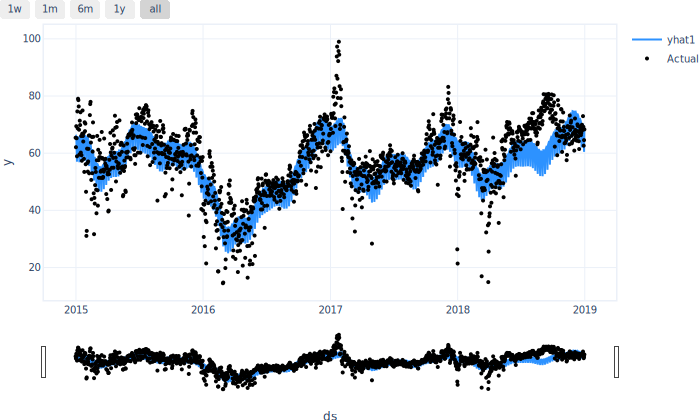

In [8]:
forecast = m.predict(df)
m.plot(forecast)

结果的可变性来自 SGD 在不同的运行中找到不同的最优值。大部分随机性来自权重的随机初始化、不同的学习率和数据加载器的不同洗牌。我们可以通过设置随机数生成器的种子来控制它

In [ ]:
set_random_seed(0)